# Cleaning the sampled dataset

For introduction and sampling of the dataset visit [this](nyc-collisions-data-sampling.ipynb) page.  

Imports and constants:

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline

data_path = "data/nyc_sample.csv"

The dataset is in a CSV file called nyc_sample.csv. Let's read the data into a pandas dataframe and inspect the first few rows of the data:

In [80]:
nyc_data = pd.read_csv(data_path)
pd.options.display.max_columns = 30 #to see all the columns
nyc_data.head(5)

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,08/19/2018,0:40,NaN,NaN,40.622414,-73.896484,"(40.622414, -73.896484)",BELT PARKWAY,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3963695,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,03/08/2018,13:00,QUEENS,11432.0,40.720165,-73.799020,"(40.720165, -73.79902)",168 STREET,GOETHALS AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,3859433,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
2,11/11/2018,15:40,BRONX,10465.0,40.827282,-73.830170,"(40.827282, -73.83017)",HUNTINGTON AVENUE,LAFAYETTE AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Backing Unsafely,Unspecified,NaN,NaN,NaN,4028471,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
3,11/16/2018,22:00,NaN,NaN,40.699936,-73.911810,"(40.699936, -73.91181)",WYCKOFF AVENUE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,4028778,Dump,Sedan,NaN,NaN,NaN
4,01/03/2018,13:05,BRONX,10458.0,40.855690,-73.881035,"(40.85569, -73.881035)",NaN,NaN,2475 SOUTHERN BOULEVARD,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,NaN,NaN,NaN,3821653,PASSENGER VEHICLE,Van,NaN,NaN,NaN


## Cleaning column names

Before cleaning the data, let's check the column names and rename some of them, making them uniform.

In [81]:
nyc_data.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'UNIQUE KEY', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5'],
      dtype='object')

When cleaning column names, let's use list comprehension to chain the vectorised operations on strings without having to type .str every time (because we operate on strings directly).

In [82]:
# trying to use dictionaries and regex to do it in more elegant manner.
# to_be_replaced = {" ": "_", "number_of_": "", "_name": "", "_code": "", "contributing_factor": "cause"}
# nyc_data.columns = [col.lower().replace("", "") for col in nyc_data.columns]

nyc_data.columns = [col
                    .lower()
                    .replace(" ", "_")
                    .replace("number_of_", "")
                    .replace("_name", "")
                    .replace("_code", "")
                    .replace("contributing_factor", "cause")
                    .replace("persons", "total")
                    for col in nyc_data.columns]

In [83]:
nyc_data.columns

Index(['date', 'time', 'borough', 'zip', 'latitude', 'longitude', 'location',
       'on_street', 'cross_street', 'off_street', 'total_injured',
       'total_killed', 'pedestrians_injured', 'pedestrians_killed',
       'cyclist_injured', 'cyclist_killed', 'motorist_injured',
       'motorist_killed', 'cause_vehicle_1', 'cause_vehicle_2',
       'cause_vehicle_3', 'cause_vehicle_4', 'cause_vehicle_5', 'unique_key',
       'vehicle_type_1', 'vehicle_type_2', 'vehicle_type_3', 'vehicle_type_4',
       'vehicle_type_5'],
      dtype='object')

Our column names look much better, but let's change their order and simplify some of them. 

In [84]:
fixed_columns = ['unique_key', 'date', 'time', 'borough', 'zip', 'latitude', 'longitude', 
                    'location', 'on_street', 'cross_street', 'off_street', 
                    'pedestrians_injured', 'cyclist_injured', 'motorist_injured', 'total_injured', 
                    'pedestrians_killed', 'cyclist_killed', 'motorist_killed', 'total_killed', 
                    'vehicle_type_1', 'vehicle_type_2', 'vehicle_type_3', 'vehicle_type_4', 
                    'vehicle_type_5', 'cause_vehicle_1', 'cause_vehicle_2','cause_vehicle_3', 
                    'cause_vehicle_4', 'cause_vehicle_5']
nyc_data = nyc_data[fixed_columns]

## Handling missing values

From the sampling process we know, that there are lots of potentially missing values. To have a good overview of what's missing, let's create dataframe object neatly showing percentages of the values missing.

In [94]:
null_counts = nyc_data.isnull().sum()
null_counts_pct = null_counts / nyc_data.shape[0] * 100
null_dataframe = pd.DataFrame({"values_null": null_counts, "percentage_null": null_counts_pct})
print(null_dataframe)

                     values_null  percentage_null
unique_key                     0         0.000000
date                           0         0.000000
time                           0         0.000000
borough                    16507        35.653038
zip                        16515        35.670317
latitude                    2995         6.468822
longitude                   2995         6.468822
location                    2995         6.468822
on_street                  11098        23.970280
cross_street               23303        50.331541
off_street                 35338        76.325623
pedestrians_injured            0         0.000000
cyclist_injured                0         0.000000
motorist_injured               0         0.000000
total_injured                  0         0.000000
pedestrians_killed             0         0.000000
cyclist_killed                 0         0.000000
motorist_killed                0         0.000000
total_killed                   0         0.000000


Around 30% of the columns have no missing values. Since none of the `killed` and `injured` columns have missing values except for `total` columns, we can easily fill those values by calculating the sum.

In [86]:
killed_columns = [col for col in nyc_data 
                  if "killed" in col and "total" not in col] #retrieving columns containing 'killed' but not 'total'
killed_df = nyc_data[killed_columns].copy() #making a copy of the dataset with columns we want to sum
nyc_data["total_killed"] = killed_df.sum(axis=1)

injured_columns = [col for col in nyc_data 
                   if "injured" in col and "total" not in col]
injured_df = nyc_data[injured_columns].copy()
nyc_data["total_injured"] = injured_df.sum(axis=1)

Let's get a better understanding of the rest of missing data by creating a heatmap of all the values in our dataset.

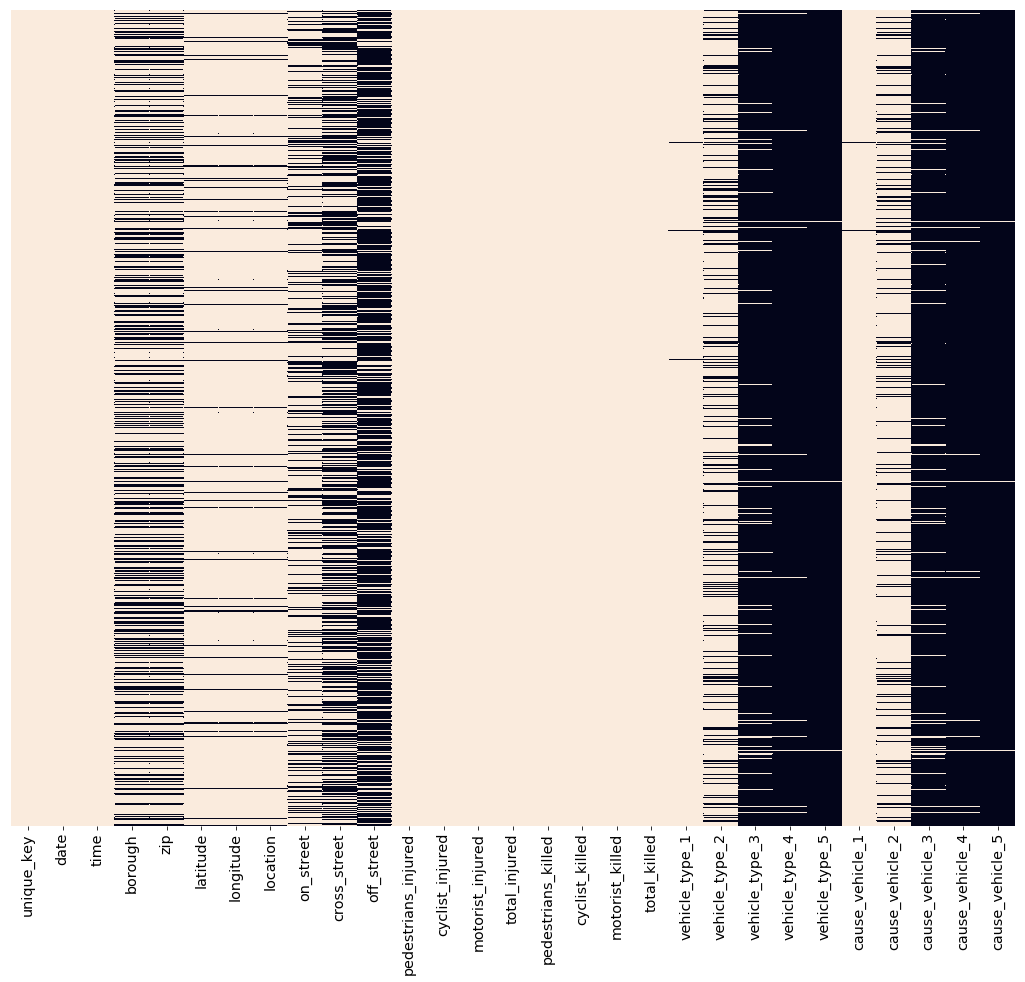

In [100]:
plt.figure(figsize=(18,15))
null_data = nyc_data.isnull() #boolean dataframe based on whether values are null
sns.heatmap(~null_data, cbar=False, yticklabels=False)#heatmap of the boolean dataframe, using ~ for inverted colours
plt.xticks(rotation=90, size='x-large')
plt.show()

Light tan colour represents values that are present, while black represents missing data. We can draw some conclusions by looking at the plot: 
1. Columns regarding type of vehicle or cause of the accident have most missing values, but it's nothing to worry about, since it's easily atributted to the number of cars involved in the accident (rarely more than two cars at a time are involved accident). Filling those values will be relatively easy.
2. Columns regarding streets are alternately filled and null, e.g. when on_street has no value, off_street or cross_street has a value and vice versa. Not all the accidents happened on the intersections, so filling some of cross_street values could be wrong. Because we don't need these columns to be overly specific, we could reduce them to one column, filling nulls with values from two others.
3. Latitude and longitude columns can be dropped, because location is a combination of both.
4. Borough values could be potentially filled using external API based off of coordinates. Zip can be dropped, because it's not relevant.